Nama		: Faza Rashif

Username		: fazarashif48

Email		: rashiffaza@gmail.com

In [ ]:
import tensorflow as tf

In [ ]:
# import datasets
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-25 03:14:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.60MB/s    in 4m 13s  

2021-04-25 03:19:02 (1.22 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
# melakukan cek pada direktori base
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
#Proses Augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest', # mengisi kosong dengan mode (aaa|abcd|ddd)
                    validation_split = 0.4  # membagi dataset menjadi train set dan validation set (40%)
                    )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset = 'training' # menjadi training set (60%) dari hasil validation_slit sebelumnya
        )
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation' # menjadi validation set (40%) dari hasil validation_slit sebelumnya
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# membangun Arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # eksekusi batch setiap epoch
      epochs=20, # menambah epoch saat akurasi belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 43s - loss: 1.1098 - accuracy: 0.3974 - val_loss: 0.9612 - val_accuracy: 0.5938
Epoch 2/20
25/25 - 43s - loss: 0.7020 - accuracy: 0.7212 - val_loss: 0.5184 - val_accuracy: 0.8188
Epoch 3/20
25/25 - 42s - loss: 0.4238 - accuracy: 0.8338 - val_loss: 0.3844 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 42s - loss: 0.3247 - accuracy: 0.8727 - val_loss: 0.2669 - val_accuracy: 0.8875
Epoch 5/20
25/25 - 42s - loss: 0.2988 - accuracy: 0.9087 - val_loss: 0.1878 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 41s - loss: 0.1662 - accuracy: 0.9442 - val_loss: 0.1279 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 41s - loss: 0.2031 - accuracy: 0.9260 - val_loss: 0.2799 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 42s - loss: 0.1417 - accuracy: 0.9588 - val_loss: 0.2013 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 42s - loss: 0.1416 - accuracy: 0.9525 - val_loss: 0.3366 - val_accuracy: 0.8687
Epoch 10/20
25/25 - 42s - loss: 0.1615 - accuracy: 0.9350 - val_loss: 0.1903 - val_accuracy: 0.9375
Epoch 11/

Saving 112650.jpg to 112650.jpg
112650.jpg
scissors


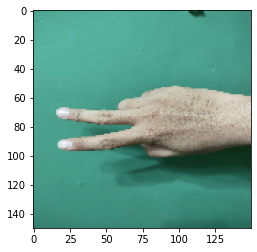

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')